In [1]:
# import required lybreris
import numpy as np
import pandas as pd

In [2]:
# read and save csv files into datafreams
athlete=pd.read_csv("athlete_events.csv")
noc=pd.read_csv("noc_regions.csv")

In [3]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#athlete.shape
#noc.shape
noc.head(1)

,NOC,region,notes
0,AFG,Afghanistan,NaN


In [5]:
# sorting datafream 'Season' column value 'summer' wise
athlete=athlete[athlete['Season']== 'Summer']

In [6]:
#athlete.shape
#athlete.tail()

In [7]:
# Merging noc datafream with athlete datafream based on 'NOC' column
athlete=athlete.merge(noc,on='NOC',how='left')
athlete.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [8]:
# Showing unique region names
athlete['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [9]:
# Identify missing values per column wise
athlete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [10]:
# Identifing duplicates rows
athlete.duplicated().sum()

1385

In [11]:
# Drop all duplicates
athlete.drop_duplicates(inplace=True)

In [12]:
athlete.duplicated().sum()

0

In [13]:
# To analysis how many Gold, Silver and Bronze medals are there in Medal Columns
athlete['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [14]:
# Create another datafream with medal column values using get_dummies method
pd.get_dummies(athlete['Medal'])

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [15]:
# Concating new datafream with athlete datafream
athlete=pd.concat([athlete,pd.get_dummies(athlete['Medal'])],axis=1)

In [16]:
# Calculate total gold, silver and Bronze Medals per NOC (Country) wise
# But here it gives wrong totla values as 'Team','NOC','Games','Year','City','Sport','Event','Medal' columns values are repiting 11 times per player wise. 
athlete.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,Russia,1220.0,974.0,994.0
2,Germany,1075.0,987.0,1064.0
3,UK,635.0,729.0,620.0
4,Italy,518.0,474.0,454.0
...,...,...,...,...
200,Lesotho,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0


In [17]:
# To solve above issue here I heve droped all duplicatrs values from columns 'Team','NOC','Games','Year','City','Sport','Event','Medal' 
medal_tally=athlete.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
medal_tally.head(1)

,region,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0


In [18]:
# Now It gives me almost actual values which tally with wikipidia 
medal_tally[medal_tally['region']=='India']

,region,Gold,Silver,Bronze
46,India,9.0,7.0,12.0


In [19]:
medal_tally['total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']
medal_tally['Gold']=medal_tally['Gold'].astype('int')
medal_tally['Silver']=medal_tally['Silver'].astype('int')
medal_tally['Bronze']=medal_tally['Bronze'].astype('int')
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545.0
1,Russia,592,498,487,1577.0
2,Germany,444,457,491,1392.0
3,UK,278,317,300,895.0
4,France,234,256,287,777.0
...,...,...,...,...,...
200,Lesotho,0,0,0,0.0
201,Albania,0,0,0,0.0
202,Libya,0,0,0,0.0
203,Liechtenstein,0,0,0,0.0


In [20]:
years=athlete['Year'].unique().tolist()

In [21]:
years.sort()

In [22]:
years.insert(0,'Overall')

In [23]:
#years

In [24]:
country=np.unique(athlete['region'].dropna().values).tolist()

In [25]:
country.sort()

In [26]:
country.insert(0,'Overall')

In [27]:
medal_df=athlete.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [28]:
def fetch_medal_tally(year, country):
    medal_df=athlete.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year =='Overall' and country == 'Overall':
        temp_df=medal_df
    if year !='Overall' and country == 'Overall':
        temp_df=medal_df[medal_df['Year']== int(year)] 
    if year =='Overall' and country != 'Overall':
        flag=1
        temp_df=medal_df[medal_df['region']==country]
    if year !='Overall' and country != 'Overall':
        temp_df=medal_df[(medal_df['Year']==int(year)) & (medal_df['region']==country)]
    if flag==1:
         x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    x['total']=x['Gold']+ x['Silver']+ x['Bronze']

    print(x)

In [29]:
#fetch_medal_tally(year="Overall",country='India')

 Overall Analysis..
    No. of editions
    No. of cities
    No. of events/sports
    No. of athletes
    Participating nations

In [30]:

athlete['Year'].unique().shape[0]-1

28

In [31]:
athlete['City'].unique().shape[0]

23

In [32]:
athlete['Sport'].unique().shape[0]

52

In [33]:
athlete['Event'].unique().shape[0]

651

In [34]:
athlete['Name'].unique().shape[0]

116122

In [35]:
athlete['region'].unique().shape[0]

206

In [36]:
nation_over_time=athlete.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values(['index'])
nation_over_time.rename(columns={'index':'Edition','Year':'No. of Countries'},inplace=True)

In [37]:
import plotly.express as px
fig=px.line(nation_over_time,x='Edition',y='No. of Countries')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

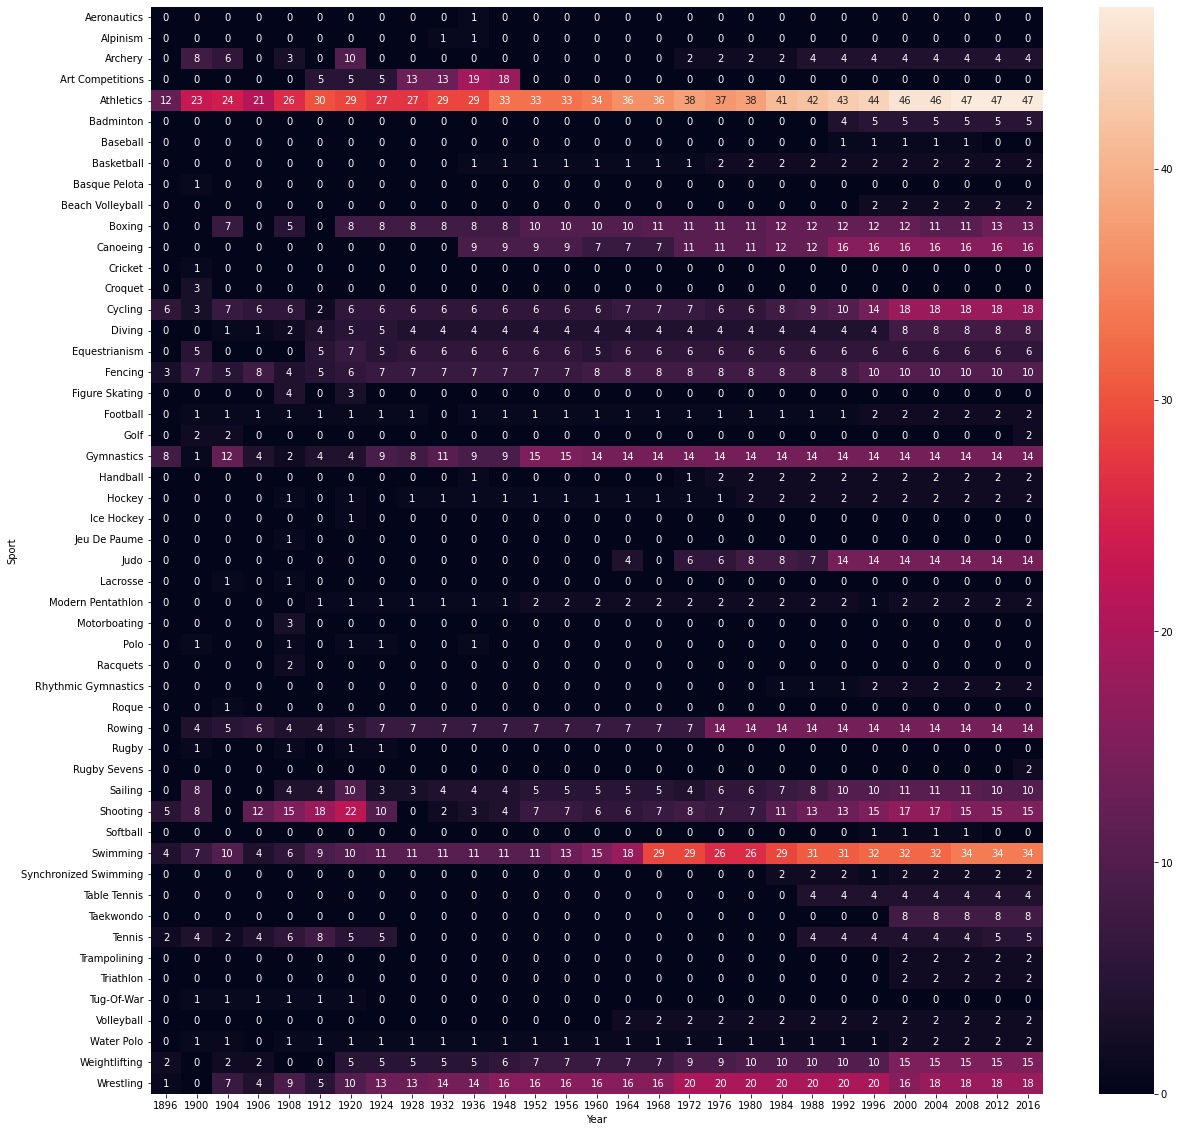

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

x=athlete.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index="Sport",columns="Year",values="Event",aggfunc="count").fillna(0).astype('int'),annot=True)

In [39]:
df=athlete
def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal'])
    if sport !="Overall":
        temp_df=temp_df[temp_df['Sport']==sport]

    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name', how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x
most_successful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


# Countrywise analysis 
    #   Countrywise medal tally per year(line plot)
    #   Which countries are good at heatmap
    #   Most successful Athletes(Top 10)

In [40]:
temp_df=df.dropna(subset='Medal')
temp_df=temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [41]:
new_df=temp_df[temp_df['region']=='USA']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()
fig=px.line(final_df,x='Year',y='Medal')
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

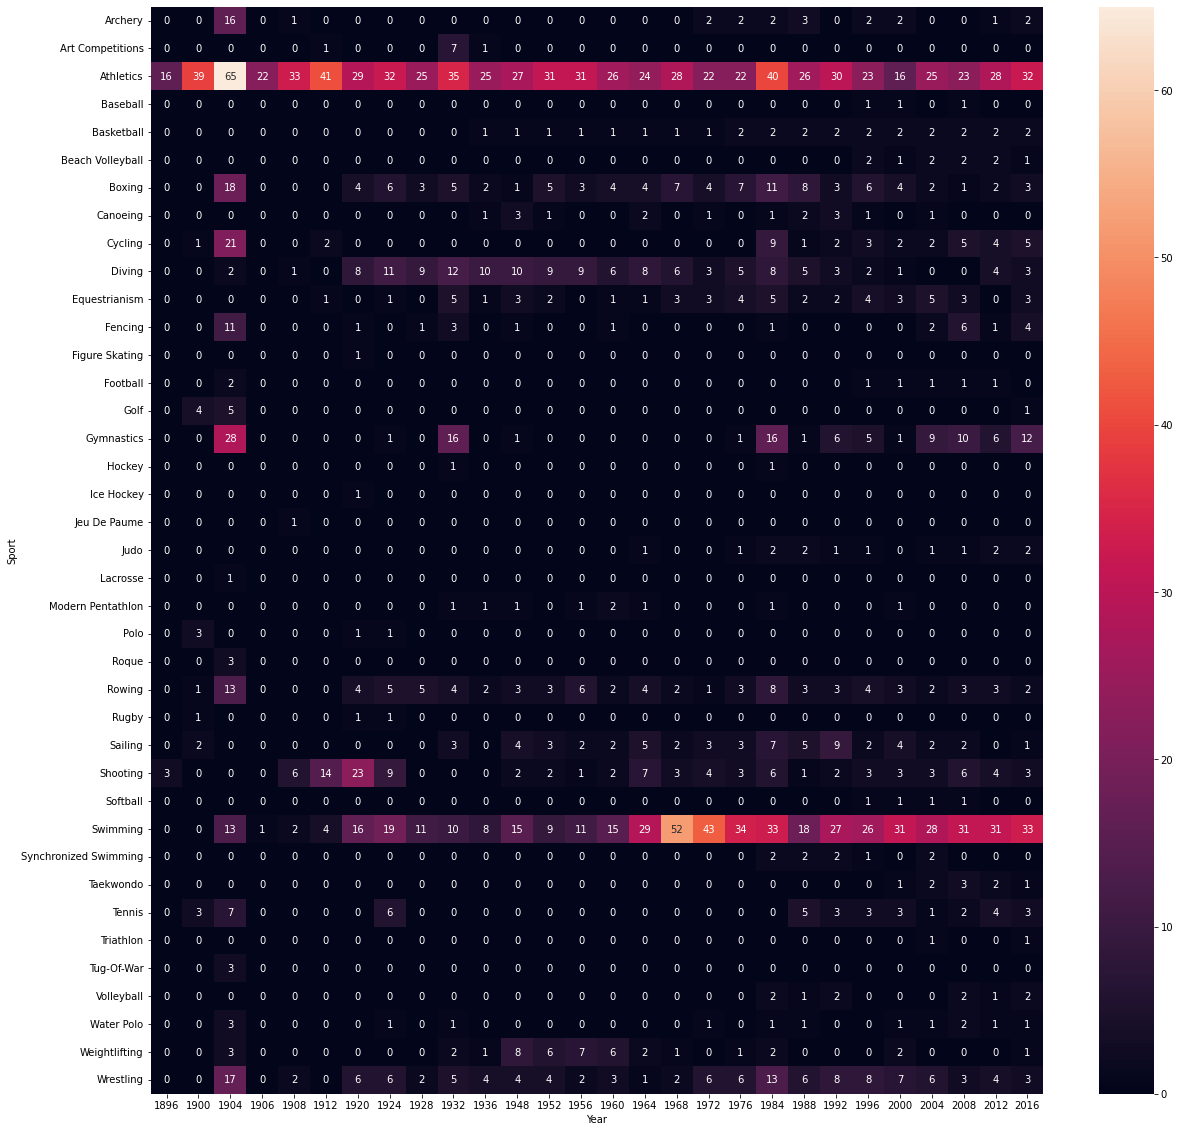

In [42]:
new_df=temp_df[temp_df['region']=='USA']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [43]:
def most_successful(df,country):
    temp_df=df.dropna(subset=['Medal']) 
    temp_df=temp_df[temp_df['region']==country]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name', how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x
most_successful(df,'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Shankar Pillay Laxman,3,Hockey
11,Ranganathan Francis,3,Hockey
14,Richard James Allen,3,Hockey
17,Balbir Singh,3,Hockey
20,Harbinder Singh Chimni,3,Hockey
23,"Balbir Singh Dosanjh, Sr.",3,Hockey
26,"Victor John ""V. J."" Peter",3,Hockey
29,Dhyan Chand Bais,3,Hockey


In [44]:
athlete_df=df.drop_duplicates(subset=['Name','region'])
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [45]:
import plotly.figure_factory as ff
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'], show_hist=False, show_rug=False)
fig.show()

In [46]:
athlete_df['Sport'].unique()
Sport_list=['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', ]

In [47]:
x=[]
name=[]
for sport in Sport_list:
    temp_df=athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

fig=ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False,width=1000,height=600)
fig.show()

In [55]:
athlete_df['Medal'].fillna('No Medal',inplace=True)
temp_df=athlete_df[athlete_df['Sport']== 'Basketball']

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

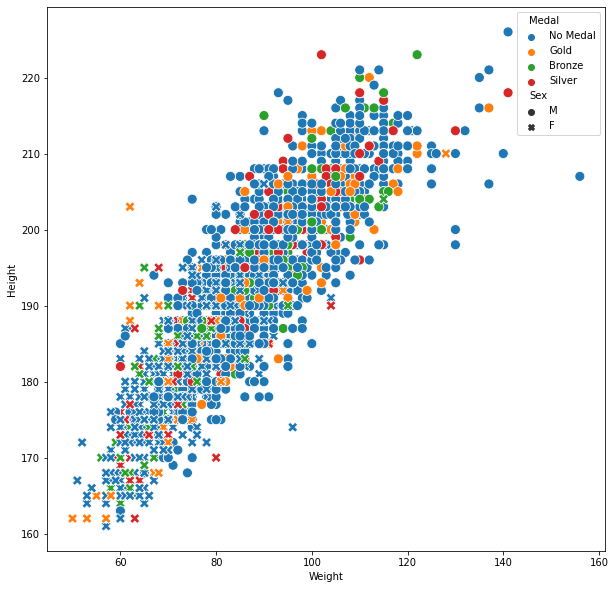

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

In [65]:
men=athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women=athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [77]:
final=pd.merge(men,women,on='Year',how='left')
final.rename(columns={'Name_x':'Men','Name_y':'Women'},inplace=True)
final.fillna(0,inplace=True)

In [78]:
fig=px.line(final,x='Year',y=['Men','Women'])
fig.show()